In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
directory = "n8/"
colmap = "jet"

if directory == "n8/":
    title = "($n=8,12,16$)"
    save = "(n=8_12_16)"

if directory == "n7/":
    title = "($n=3,7,11,15$)"
    save = "(n=3_7_11_15)"

if directory == "n6/":
    title = "($n=6,10,14$)"
    save = "(n=6_10_14)"
    
if directory == "n5/":
    title = "($n=5,9,13,17$)"
    save = "(n=5_9_13_17)"
    
#Axis Labels
#E = ["90","80","70","60","50","40","30","20","10"]

gridy = [0,1,2,3,4,5,6,7,8]
gridx = [4,10,18,26,39,55,71]

beta1 = ["0.005","0.01","0.02","0.03","0.04","0.06","0.08","0.1"]
E = [90,80,70,60,50,40,30,20,10]
beta = np.array([2,7,14,22,32,47,63,79])

#dataframe GR
dataGR = pd.read_excel(directory + "HeatmapGR.xlsx")
dataGR = dataGR.reindex(index=dataGR.index[::-1])
dataGR.index = E

#dataframe f
dataF = pd.read_excel(directory + "HeatmapF.xlsx")
dataF = dataF.reindex(index=dataF.index[::-1])
dataF.index = E

<IPython.core.display.Javascript object>


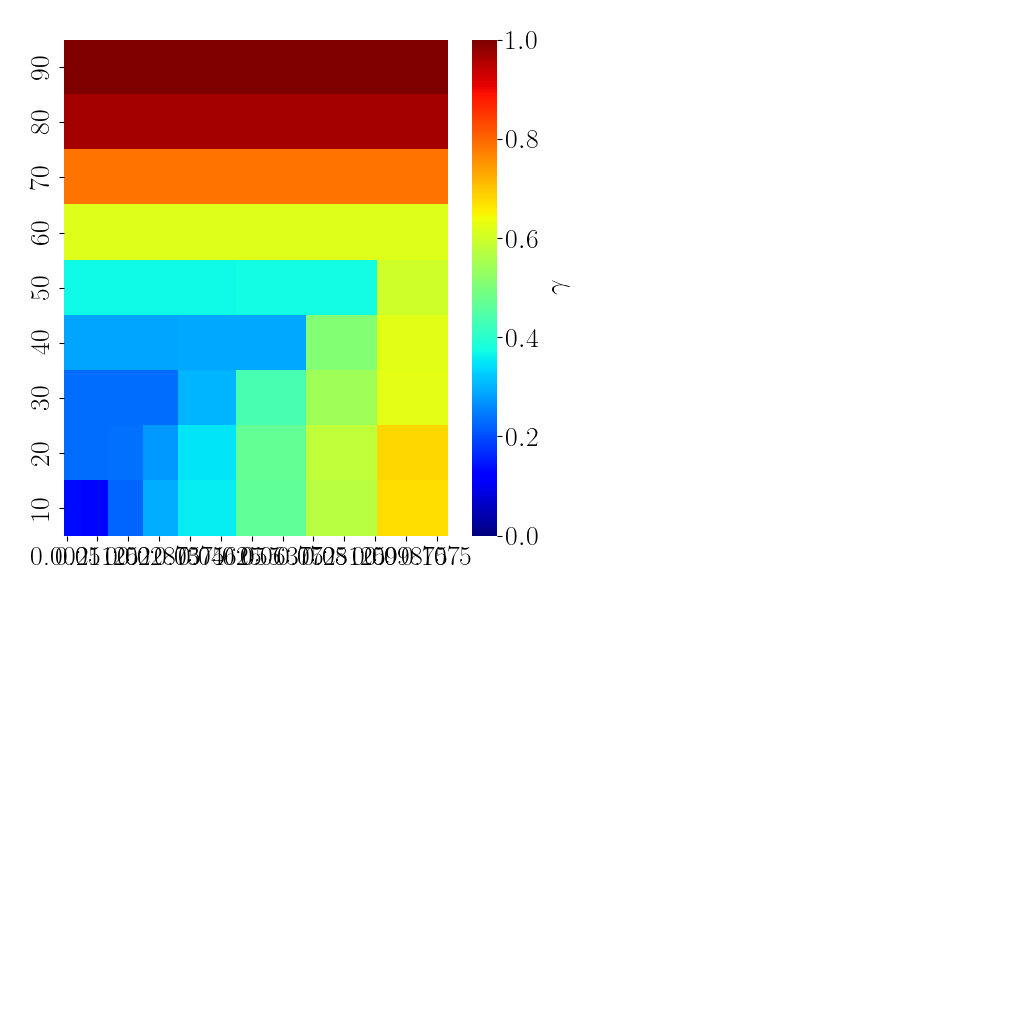

In [3]:
%matplotlib notebook
plt.figure(figsize=(6,6))

annot_kws={'fontsize':10, 
           'fontstyle':'italic',  
           'color':"k",
           'alpha':0.8, 
           'rotation':"horizontal",
           'verticalalignment':'center'}

cbar_kws = {"orientation":"vertical", 
            'label':'$\gamma$',
            "shrink":1,
            "ticks":[0.0,0.2,0.4,0.6,0.8,1.0],
            "pad":0.05,
           }

ax = sns.heatmap(dataGR, annot=False, annot_kws = annot_kws, fmt=".3f", 
            linewidths=0, square = False,
            cmap = colmap,cbar_kws = cbar_kws, vmin=0,vmax=1.0)

ax.collections[0].colorbar.set_label('$\gamma$', size=22,rotation=0,
                                    labelpad=10)

plt.xticks(beta,beta1,size=16)
plt.yticks(size=16)

plt.title(f"AE Growth Rate {title}", size=22)
plt.xlabel(r"$\beta$",fontsize=20)
plt.ylabel(r"$T_{f} (KeV)$",fontsize=20)

for i in range(0,len(gridx)):
    plt.axvline(gridx[i],color="w",linewidth=0.8)
    plt.axhline(gridy[i],color="w",linewidth=0.8)
    
plt.axhline(gridy[i+1],color="w",linewidth=0.8)
plt.axhline(gridy[i+2],color="w",linewidth=0.8)

plt.show()
plt.savefig(directory + f"Exp_GR_FLR_{save}.jpg",dpi=800)

<IPython.core.display.Javascript object>


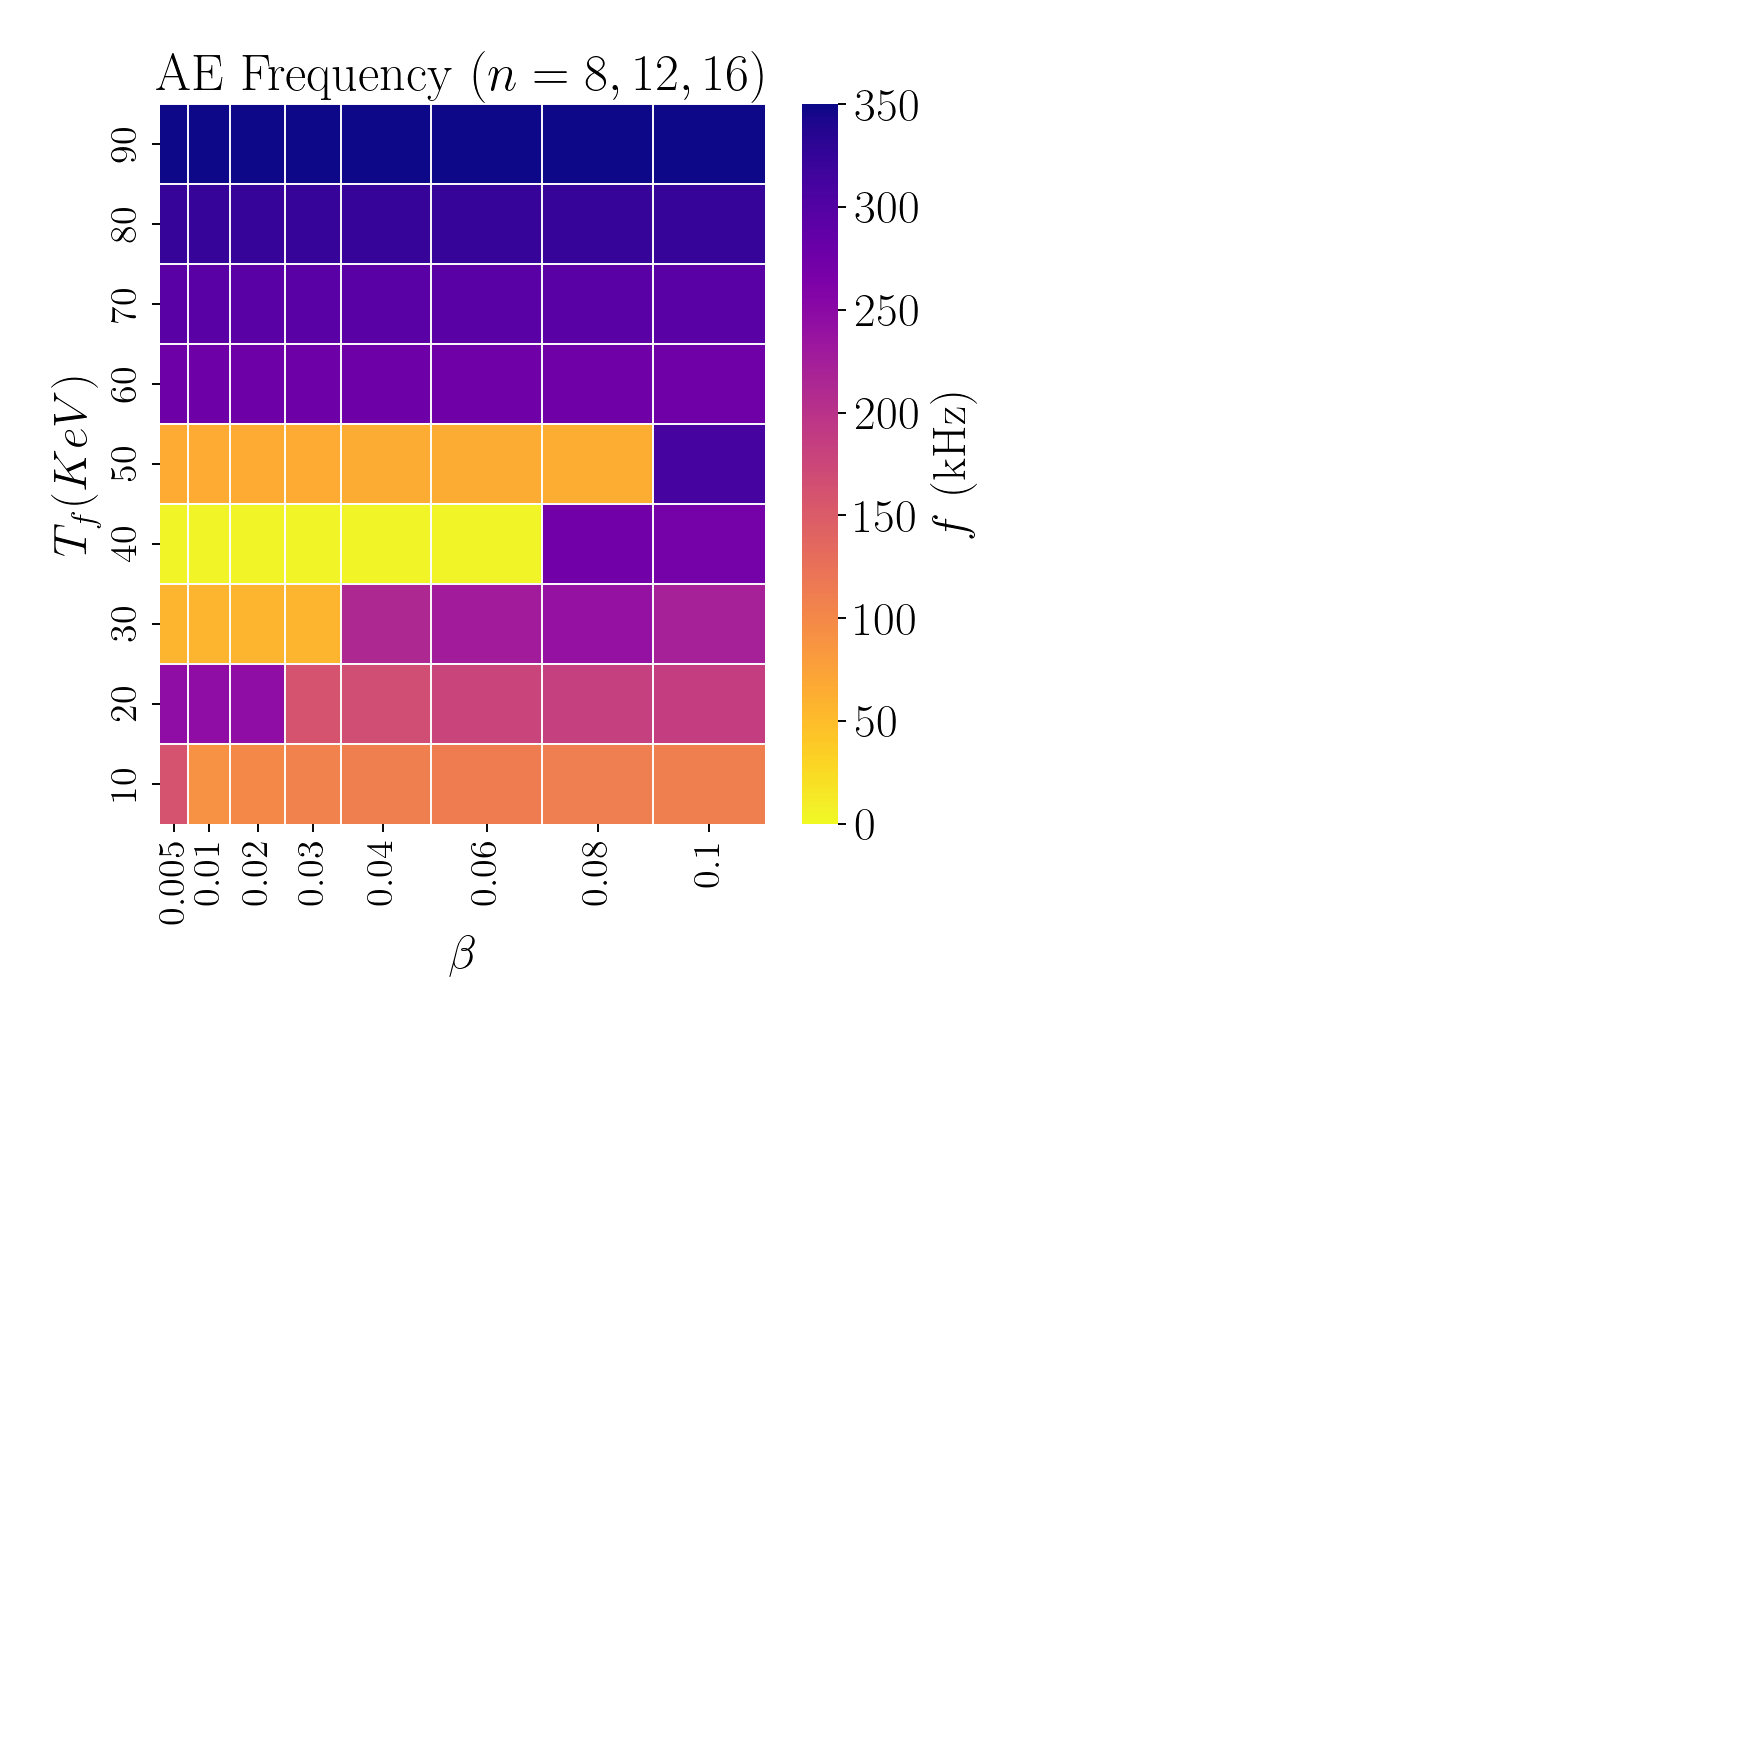

In [4]:
%matplotlib notebook
plt.figure(figsize=(6,6))
colmap="plasma_r"

annot_kws={'fontsize':10, 
           'fontstyle':'italic',  
           'color':"k",
           'alpha':0.8, 
           'rotation':"horizontal",
           'verticalalignment':'center'}

cbar_kws = {"orientation":"vertical", 
            'label': '$f$ (kHz)',
            'extendfrac':1,
            "ticklocation":"top",
            "shrink":1, 
            "ticks":[0,50,100,150,200,250,300,350],
            "pad":0.05,
           }

ax = sns.heatmap(dataF, cbar=True, annot=False, annot_kws = annot_kws, fmt=".0f", 
            linewidths=0, square = False, cmap = colmap,
               cbar_kws = cbar_kws,vmin=0, vmax=350)

plt.xticks(beta,beta1,size=16)
plt.yticks(size=16)

plt.title(f"AE Frequency {title}", size=22)
plt.xlabel(r"$\beta$",fontsize=20)
plt.ylabel(r"$T_{f} (KeV)$",fontsize=20)

for i in range(0,len(gridx)):
    plt.axvline(gridx[i],color="w",linewidth=0.8)
    plt.axhline(gridy[i],color="w",linewidth=0.8)
    
plt.axhline(gridy[i+1],color="w",linewidth=0.8)
plt.axhline(gridy[i+2],color="w",linewidth=0.8)

plt.savefig(directory + f"Exp_F_FLR_{save}.jpg",dpi=800)